In [1]:
# Question 1: Use yfinance to Extract Stock Data
import yfinance as yf

tesla_data = yf.download('TSLA')
tesla_data.reset_index(inplace=True)

tesla_data.to_csv('tesla_stock_data.csv', index=True)
print(tesla_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [2]:
# Question 2: Use Webscraping to Extract Tesla Revenue Data
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set headers to avoid bot detection
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Get HTML content
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')

# Find the Tesla Quarterly Revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Clean the table
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

# Save and display
tesla_revenue.to_csv('tesla_revenue_data.csv', index=False)
tesla_revenue.tail()


C:\Users\tejva\AppData\Local\Temp\ipykernel_26532\905381949.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


,Date,Revenue
58,2010-06-30,28.0
59,2010-03-31,21.0
60,2009-12-31,NaN
61,2009-09-30,46.0
62,2009-06-30,27.0


In [3]:
# Question 3: Use yfinance to Extract GameStop Stock Data
import yfinance as yf

# Download historical GME stock data
gme_data = yf.download('GME')

# Reset index to turn the date into a column
gme_data.reset_index(inplace=True)

# Save to CSV
gme_data.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows
gme_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2002-02-13,1.691667,1.693350,1.603296,1.620128,76216000
1,2002-02-14,1.683250,1.716074,1.670626,1.712707,11021600
2,2002-02-15,1.674834,1.687459,1.658002,1.683251,8389600
3,2002-02-19,1.607504,1.666418,1.578047,1.666418,7410400
4,2002-02-20,1.662210,1.662210,1.603296,1.615920,6892800


In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Set up headers to simulate a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# GME revenue URL
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
html_data = response.text

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Locate the correct table
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = pd.read_html(str(table))[0]
        break

# Clean and prepare the dataframe
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({'\$': '', ',': ''}, regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != '']
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

# Display last five rows
gme_revenue.tail()


C:\Users\tejva\AppData\Local\Temp\ipykernel_26532\4011270368.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


,Date,Revenue
60,2010-01-31,3524.0
61,2009-10-31,1835.0
62,2009-07-31,1739.0
63,2009-04-30,1981.0
64,2009-01-31,3492.0


ValueError: 'tabblue' is not a valid value for color

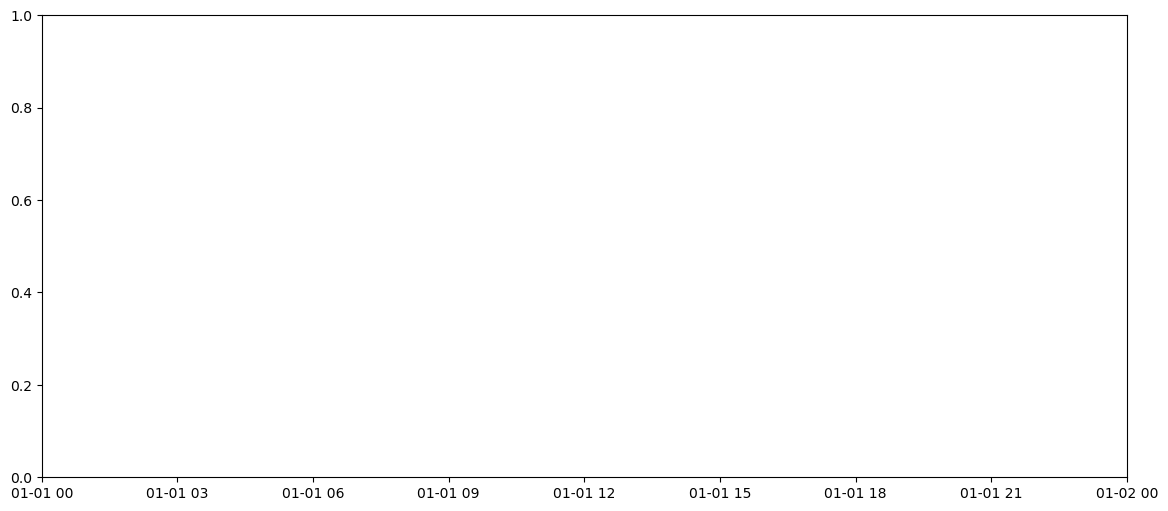

In [5]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock data
    ax1.plot(stock_data.Date, stock_data.Close, color='tabblue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='tabblue')
    ax1.tick_params(axis='y', labelcolor='tabblue')
    ax1.set_title(title)

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data.Date, revenue_data.Revenue, color='tabred', label='Revenue')
    ax2.set_ylabel("Revenue (USD Millions)", color='tabred')
    ax2.tick_params(axis='y', labelcolor='tabred')

    fig.tight_layout()
    plt.show()

# Ensure 'tesla_data' and 'tesla_revenue' are already defined as from earlier questions
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price vs Revenue')


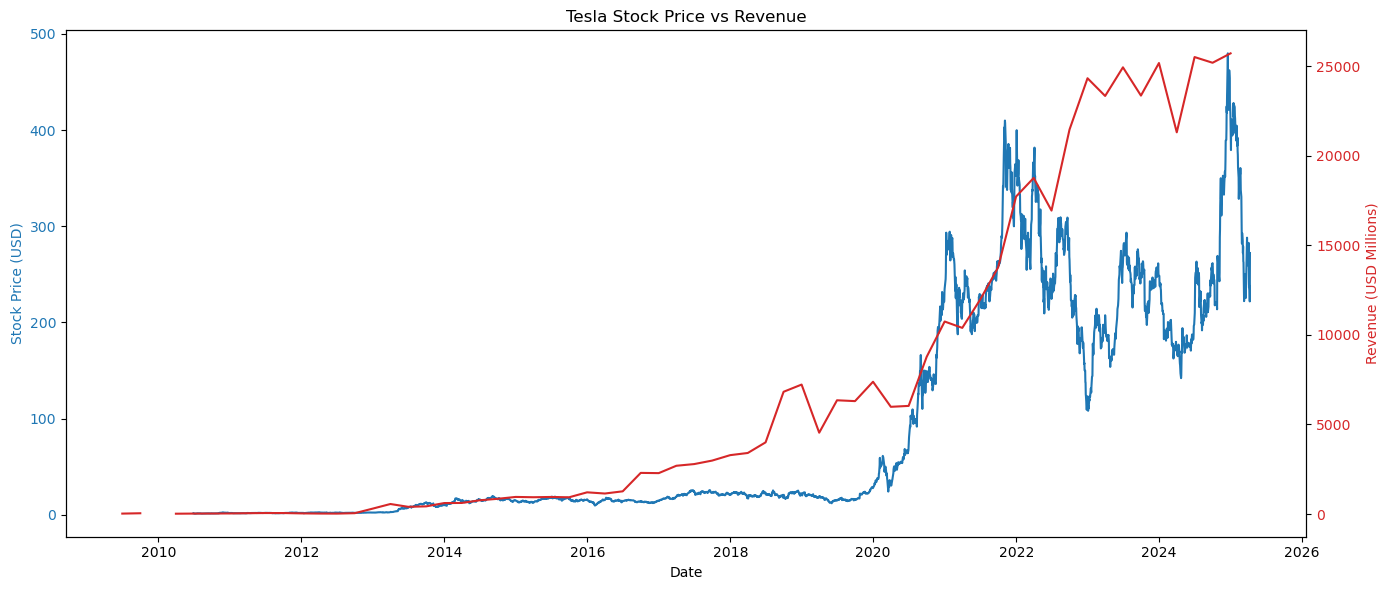

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' columns to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Define the plotting function
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock price
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(title)

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.set_ylabel("Revenue (USD Millions)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.show()

# Call the function to plot Tesla data
make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price vs Revenue')


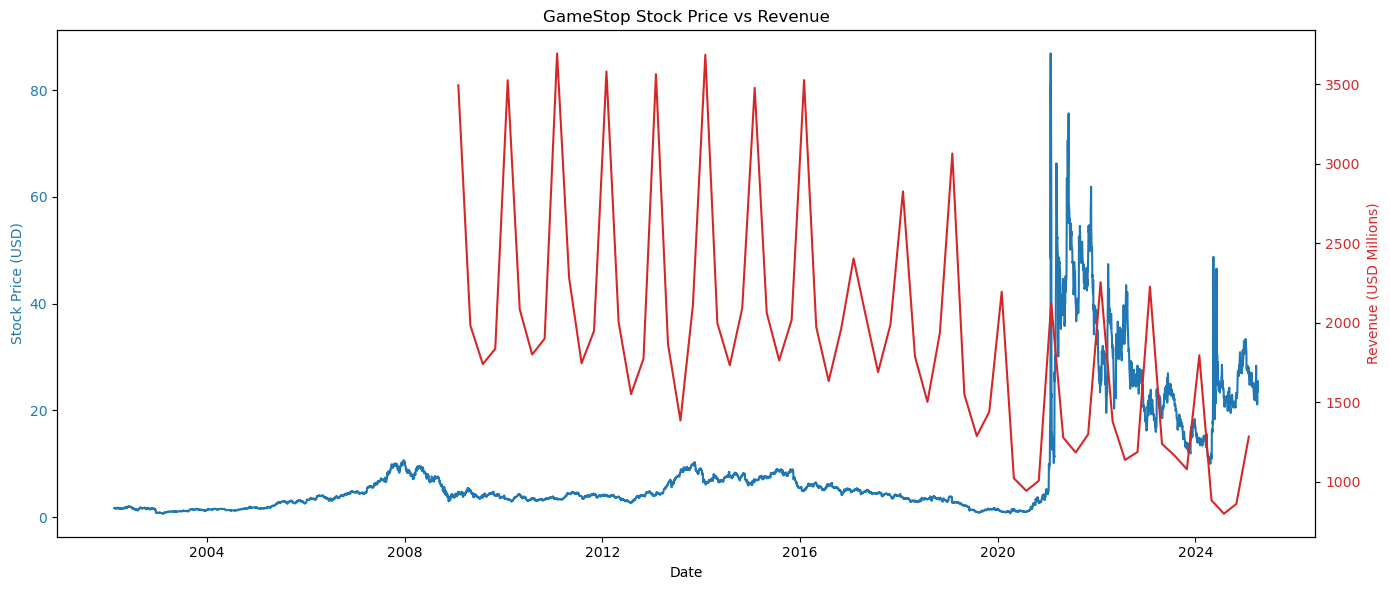

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' columns to datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Define the plotting function (you may have already defined this)
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(title)

    # Create a second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='tab:red', label='Revenue')
    ax2.set_ylabel("Revenue (USD Millions)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.show()

# Call the function to plot GameStop data
make_graph(gme_data, gme_revenue, 'GME', 'GameStop Stock Price vs Revenue')
